In [1]:
# Import libraries

import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

In [2]:
# change warning settings
warnings.filterwarnings("ignore")

In [3]:
# load data
indicadores_df = pd.read_excel('../DataSource/1 Indicadores_del_desarrollo_humano_mundial Banco Mundial.xlsx')
indicadores_df.head(5)

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Estados Unidos,USA,9632030,9632030,9632030,9632030,9632030,9632030,...,9831510,9831510,9831510,9831510,9831510,9831510,9831510,9831510,9831510,..
1,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Unión Europea,EUU,4384964.995117,4384984.995117,4385294.995117,4385644.995117,4385414.995117,4385434.995117,...,4386039.990234,4386021.99707,4383341.99707,4384062.192383,4384082.592773,4384131.577148,4384317.592773,4384317.592773,4384317.592773,..
2,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Japón,JPN,377800,377880,377890,377900,377910,377910,...,377950,377955,377960,377961.992188,377961.992188,377971.015625,377970,377970,377970,..
3,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Mundo,WLD,131606512.293178,131606902.668177,131607327.418178,131607728.793148,131605872.777079,131607830.159892,...,131805574.218215,131805826.432909,131803288.425096,132047813.110236,132046109.51847,132048793.077485,132036620.811879,132036620.811879,132025199.411879,..
4,"INB, método Atlas (US$ a precios actuales)",NY.GNP.ATLS.CD,Estados Unidos,USA,10147603801972.083984,10462204209818.1875,10732675433275.623047,11536447371063.488281,12740511355508.546875,13651359826763.560547,...,15154198695429.419922,15756881924473.791016,16560497008306.333984,17048936792646.988281,17776476297335.480469,18191395170920.964844,18467339419486.53125,19194752830167.121094,20636317813893.097656,..


In [6]:
len(indicadores_df['Series Name'].unique())

61

In [4]:
indicadores_df['Series Name'].unique()  # the unique values of all the variables

array(['Superficie (kilómetros cuadrados)',
       'INB, método Atlas (US$ a precios actuales)',
       'INB per cápita, método Atlas (US$ a precios actuales)',
       'INB, PPA (a $ internacionales actuales)',
       'INB per cápita, PPA (a $ internacionales actuales)',
       'Esperanza de vida al nacer, total (años)',
       'Tasa de fertilidad, total (nacimientos por cada mujer)',
       'Prevalencia de uso de métodos anticonceptivos (% de mujeres entre 15 y 49 años)',
       'Nacimientos asistidos por personal de salud capacitado (% del total)',
       'Tasa de mortalidad, menores de 5 años (por cada 1.000)',
       'Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)',
       'Inscripción escolar, nivel primario (% bruto)',
       'Inscripción escolar, nivel secundario (% bruto)',
       'Proporción de niñas con respecto a niños en educación primaria y secundaria (%)',
       'Área selvática  (kilómetros cuadrados)',
       'Áreas pr

In [7]:
# we are going to analize only these variables:
variables = ['INB, método Atlas (US$ a precios actuales)',
       'INB per cápita, método Atlas (US$ a precios actuales)',
       'INB, PPA (a $ internacionales actuales)',
       'INB per cápita, PPA (a $ internacionales actuales)',
       'PIB (US$ a precios actuales)', 'Crecimiento del PIB (% anual)',
       'Inflación, índice de deflación del PIB (% anual)',
       'Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)',
       'Desempleo, total (% de la población activa total) (estimación modelado OIT)',
       'Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)',
       'Población activa, total',
       'Población de 65 años de edad y más, hombres',
       'Población de 65 años de edad y más, mujeres',
       'Población de 65 años de edad y más, total',
       'Población entre 0 y 14 años de edad, hombres',
       'Población entre 0 y 14 años de edad, mujeres',
       'Población entre 0 y 14 años de edad, total',
       'Población entre 15 y 64 años de edad, hombres',
       'Población entre 15 y 64 años de edad, mujeres',
       'Población entre 15 y 64 años de edad, total',
       'Población activa, mujeres (% de la población activa total)']

indicadores_df = indicadores_df[indicadores_df['Series Name'].isin(variables)]

In [9]:
len(indicadores_df['Series Name'].unique())

21

In [6]:
indicadores_df.info() # General info about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 4 to 231
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    84 non-null     object
 1   Series Code    84 non-null     object
 2   Country Name   84 non-null     object
 3   Country Code   84 non-null     object
 4   2000 [YR2000]  84 non-null     object
 5   2001 [YR2001]  84 non-null     object
 6   2002 [YR2002]  84 non-null     object
 7   2003 [YR2003]  84 non-null     object
 8   2004 [YR2004]  84 non-null     object
 9   2005 [YR2005]  84 non-null     object
 10  2006 [YR2006]  84 non-null     object
 11  2007 [YR2007]  84 non-null     object
 12  2008 [YR2008]  84 non-null     object
 13  2009 [YR2009]  84 non-null     object
 14  2010 [YR2010]  84 non-null     object
 15  2011 [YR2011]  84 non-null     object
 16  2012 [YR2012]  84 non-null     object
 17  2013 [YR2013]  84 non-null     object
 18  2014 [YR2014]  84 non-null     objec

In [7]:
# replacing missing values '..' with Nan
indicadores_df.replace('..', np.nan, inplace=True)

In [8]:
# all the year columns have a [YRxxxx] pattern that must be eliminated for clarity

patron_a_eliminar = re.compile(r' \[YR\d{4}\]')
nuevos_nombres_col = [patron_a_eliminar.sub('', columna) for columna in indicadores_df.columns]
indicadores_df.rename(columns=dict(zip(indicadores_df.columns, nuevos_nombres_col)), inplace=True)

In [9]:
indicadores_df.info()   # Now we see year 2019 has few data

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 4 to 231
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series Name   84 non-null     object 
 1   Series Code   84 non-null     object 
 2   Country Name  84 non-null     object 
 3   Country Code  84 non-null     object 
 4   2000          84 non-null     float64
 5   2001          84 non-null     float64
 6   2002          84 non-null     float64
 7   2003          84 non-null     float64
 8   2004          84 non-null     float64
 9   2005          84 non-null     float64
 10  2006          84 non-null     float64
 11  2007          84 non-null     float64
 12  2008          84 non-null     float64
 13  2009          84 non-null     float64
 14  2010          84 non-null     float64
 15  2011          84 non-null     float64
 16  2012          84 non-null     float64
 17  2013          84 non-null     float64
 18  2014          84 non-null     float6

In [10]:
indicadores_df.isna().sum()     # total missing values per column

Series Name      0
Series Code      0
Country Name     0
Country Code     0
2000             0
2001             0
2002             0
2003             0
2004             0
2005             0
2006             0
2007             0
2008             0
2009             0
2010             0
2011             0
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
2018             0
2019            64
dtype: int64

<Axes: >

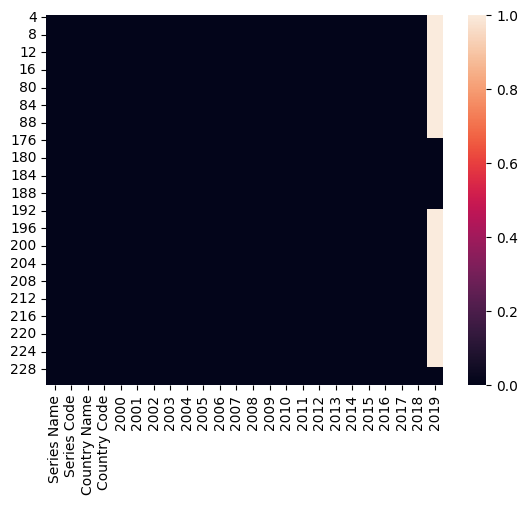

In [11]:
# heatmap showing missing values:
sns.heatmap(indicadores_df.isna())

In [12]:
indicadores_df[indicadores_df['2019'].notnull()][['Series Name','2019']]      # for year 2019 we only have info about unemployment and active population

,Series Name,2019
176,"Desempleo, mujeres (% de la población activa f...",3.616000e+00
177,"Desempleo, mujeres (% de la población activa f...",7.029246e+00
178,"Desempleo, mujeres (% de la población activa f...",2.145000e+00
179,"Desempleo, mujeres (% de la población activa f...",5.581494e+00
180,"Desempleo, total (% de la población activa tot...",3.682000e+00
181,"Desempleo, total (% de la población activa tot...",6.663976e+00
182,"Desempleo, total (% de la población activa tot...",2.291000e+00
183,"Desempleo, total (% de la población activa tot...",5.394514e+00
184,"Desempleo, varones (% de la población activa m...",3.738000e+00
185,"Desempleo, varones (% de la población activa m...",6.354227e+00


In [13]:
# let´s drop 2019 column
indicadores_df.drop(columns=['2019'], inplace=True)

In [14]:
# Also drop 'Series Code' and 'Country Code'
indicadores_df.drop(columns=['Series Code', 'Country Code'], inplace=True)

In [15]:
# let´s see again the first 5 rows:
indicadores_df.head(5)

,Series Name,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
4,"INB, método Atlas (US$ a precios actuales)",Estados Unidos,1.014760e+13,1.046220e+13,1.073268e+13,1.153645e+13,1.274051e+13,1.365136e+13,1.428563e+13,1.460832e+13,...,1.464370e+13,1.515420e+13,1.575688e+13,1.656050e+13,1.704894e+13,1.777648e+13,1.819140e+13,1.846734e+13,1.919475e+13,2.063632e+13
5,"INB, método Atlas (US$ a precios actuales)",Unión Europea,7.922740e+12,7.639017e+12,7.515658e+12,8.523563e+12,1.040852e+13,1.201996e+13,1.293331e+13,1.388068e+13,...,1.521783e+13,1.532417e+13,1.551214e+13,1.523046e+13,1.540560e+13,1.543166e+13,1.485149e+13,1.434134e+13,1.418870e+13,1.540052e+13
6,"INB, método Atlas (US$ a precios actuales)",Japón,4.595163e+12,4.675882e+12,4.434185e+12,4.479549e+12,4.899555e+12,5.182638e+12,5.105065e+12,4.959300e+12,...,4.967604e+12,5.562858e+12,5.992371e+12,6.315108e+12,6.152742e+12,5.593496e+12,4.937690e+12,4.811003e+12,4.877472e+12,5.226599e+12
7,"INB, método Atlas (US$ a precios actuales)",Mundo,3.356195e+13,3.384812e+13,3.401796e+13,3.699707e+13,4.268453e+13,4.788949e+13,5.172709e+13,5.581686e+13,...,6.144178e+13,6.515097e+13,6.934257e+13,7.438330e+13,7.797293e+13,7.977004e+13,7.822252e+13,7.719334e+13,7.847773e+13,8.446710e+13
8,"INB per cápita, método Atlas (US$ a precios ac...",Estados Unidos,3.596000e+04,3.671000e+04,3.731000e+04,3.977000e+04,4.351000e+04,4.619000e+04,4.788000e+04,4.850000e+04,...,4.773000e+04,4.899000e+04,5.057000e+04,5.277000e+04,5.395000e+04,5.585000e+04,5.674000e+04,5.718000e+04,5.906000e+04,6.317000e+04


In [16]:
# now, let´s reorder the data stacking the years and unstacking the 'Series Name':
indicadores = (
    indicadores_df.set_index(["Country Name", "Series Name"])
    .stack()
    .unstack(level=1)
    .rename_axis(columns=None, index=["Country Name", "Year"])
    .reset_index()
)
indicadores.head()

,Country Name,Year,Crecimiento del PIB (% anual),"Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)","Desempleo, total (% de la población activa total) (estimación modelado OIT)","Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)","INB per cápita, PPA (a $ internacionales actuales)","INB per cápita, método Atlas (US$ a precios actuales)","INB, PPA (a $ internacionales actuales)","INB, método Atlas (US$ a precios actuales)",...,"Población activa, total","Población de 65 años de edad y más, hombres","Población de 65 años de edad y más, mujeres","Población de 65 años de edad y más, total","Población entre 0 y 14 años de edad, hombres","Población entre 0 y 14 años de edad, mujeres","Población entre 0 y 14 años de edad, total","Población entre 15 y 64 años de edad, hombres","Población entre 15 y 64 años de edad, mujeres","Población entre 15 y 64 años de edad, total"
0,Estados Unidos,2000,4.127484,4.100,3.992,3.901,36800.0,35960.0,1.038386e+13,1.014760e+13,...,146729576.0,14414059.0,20387123.0,34801176.0,31330276.0,29907093.0,61237370.0,93239646.0,92884214.0,186123865.0
1,Estados Unidos,2001,0.998341,4.653,4.731,4.797,37700.0,36710.0,1.074371e+13,1.046220e+13,...,147698388.0,14620751.0,20469861.0,35090876.0,31396354.0,29953328.0,61349552.0,94410726.0,94117935.0,188528528.0
2,Estados Unidos,2002,1.741695,5.610,5.783,5.929,38430.0,37310.0,1.105432e+13,1.073268e+13,...,148526037.0,14818992.0,20534403.0,35353639.0,31501156.0,30039941.0,61540958.0,95474911.0,95255789.0,190730595.0
3,Estados Unidos,2003,2.861211,5.661,5.989,6.266,39740.0,39770.0,1.153027e+13,1.153645e+13,...,149140813.0,15016619.0,20601784.0,35618525.0,31584885.0,30115848.0,61700652.0,96471064.0,96317733.0,192788756.0
4,Estados Unidos,2004,3.798891,5.397,5.529,5.640,42060.0,43510.0,1.231399e+13,1.274051e+13,...,150211571.0,15239541.0,20724462.0,35964061.0,31622791.0,30158889.0,61781645.0,97587329.0,97472285.0,195059592.0


In [17]:
indicadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 23 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country Name                                                                       76 non-null     object 
 1   Year                                                                               76 non-null     object 
 2   Crecimiento del PIB (% anual)                                                      76 non-null     float64
 3   Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)   76 non-null     float64
 4   Desempleo, total (% de la población activa total) (estimación modelado OIT)        76 non-null     float64
 5   Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)  76 non-null     float64
 

In [18]:
# change data type for Year column:

indicadores['Year'] = indicadores['Year'].astype('int64')

In [19]:
indicadores['Country Name'].unique()

array(['Estados Unidos', 'Japón', 'Mundo', 'Unión Europea'], dtype=object)

In [20]:
# Exporting the dataframe in excel format, in order to use the clean data for analysis
indicadores.to_excel('../DataClean/indicadores.xlsx', index=False)

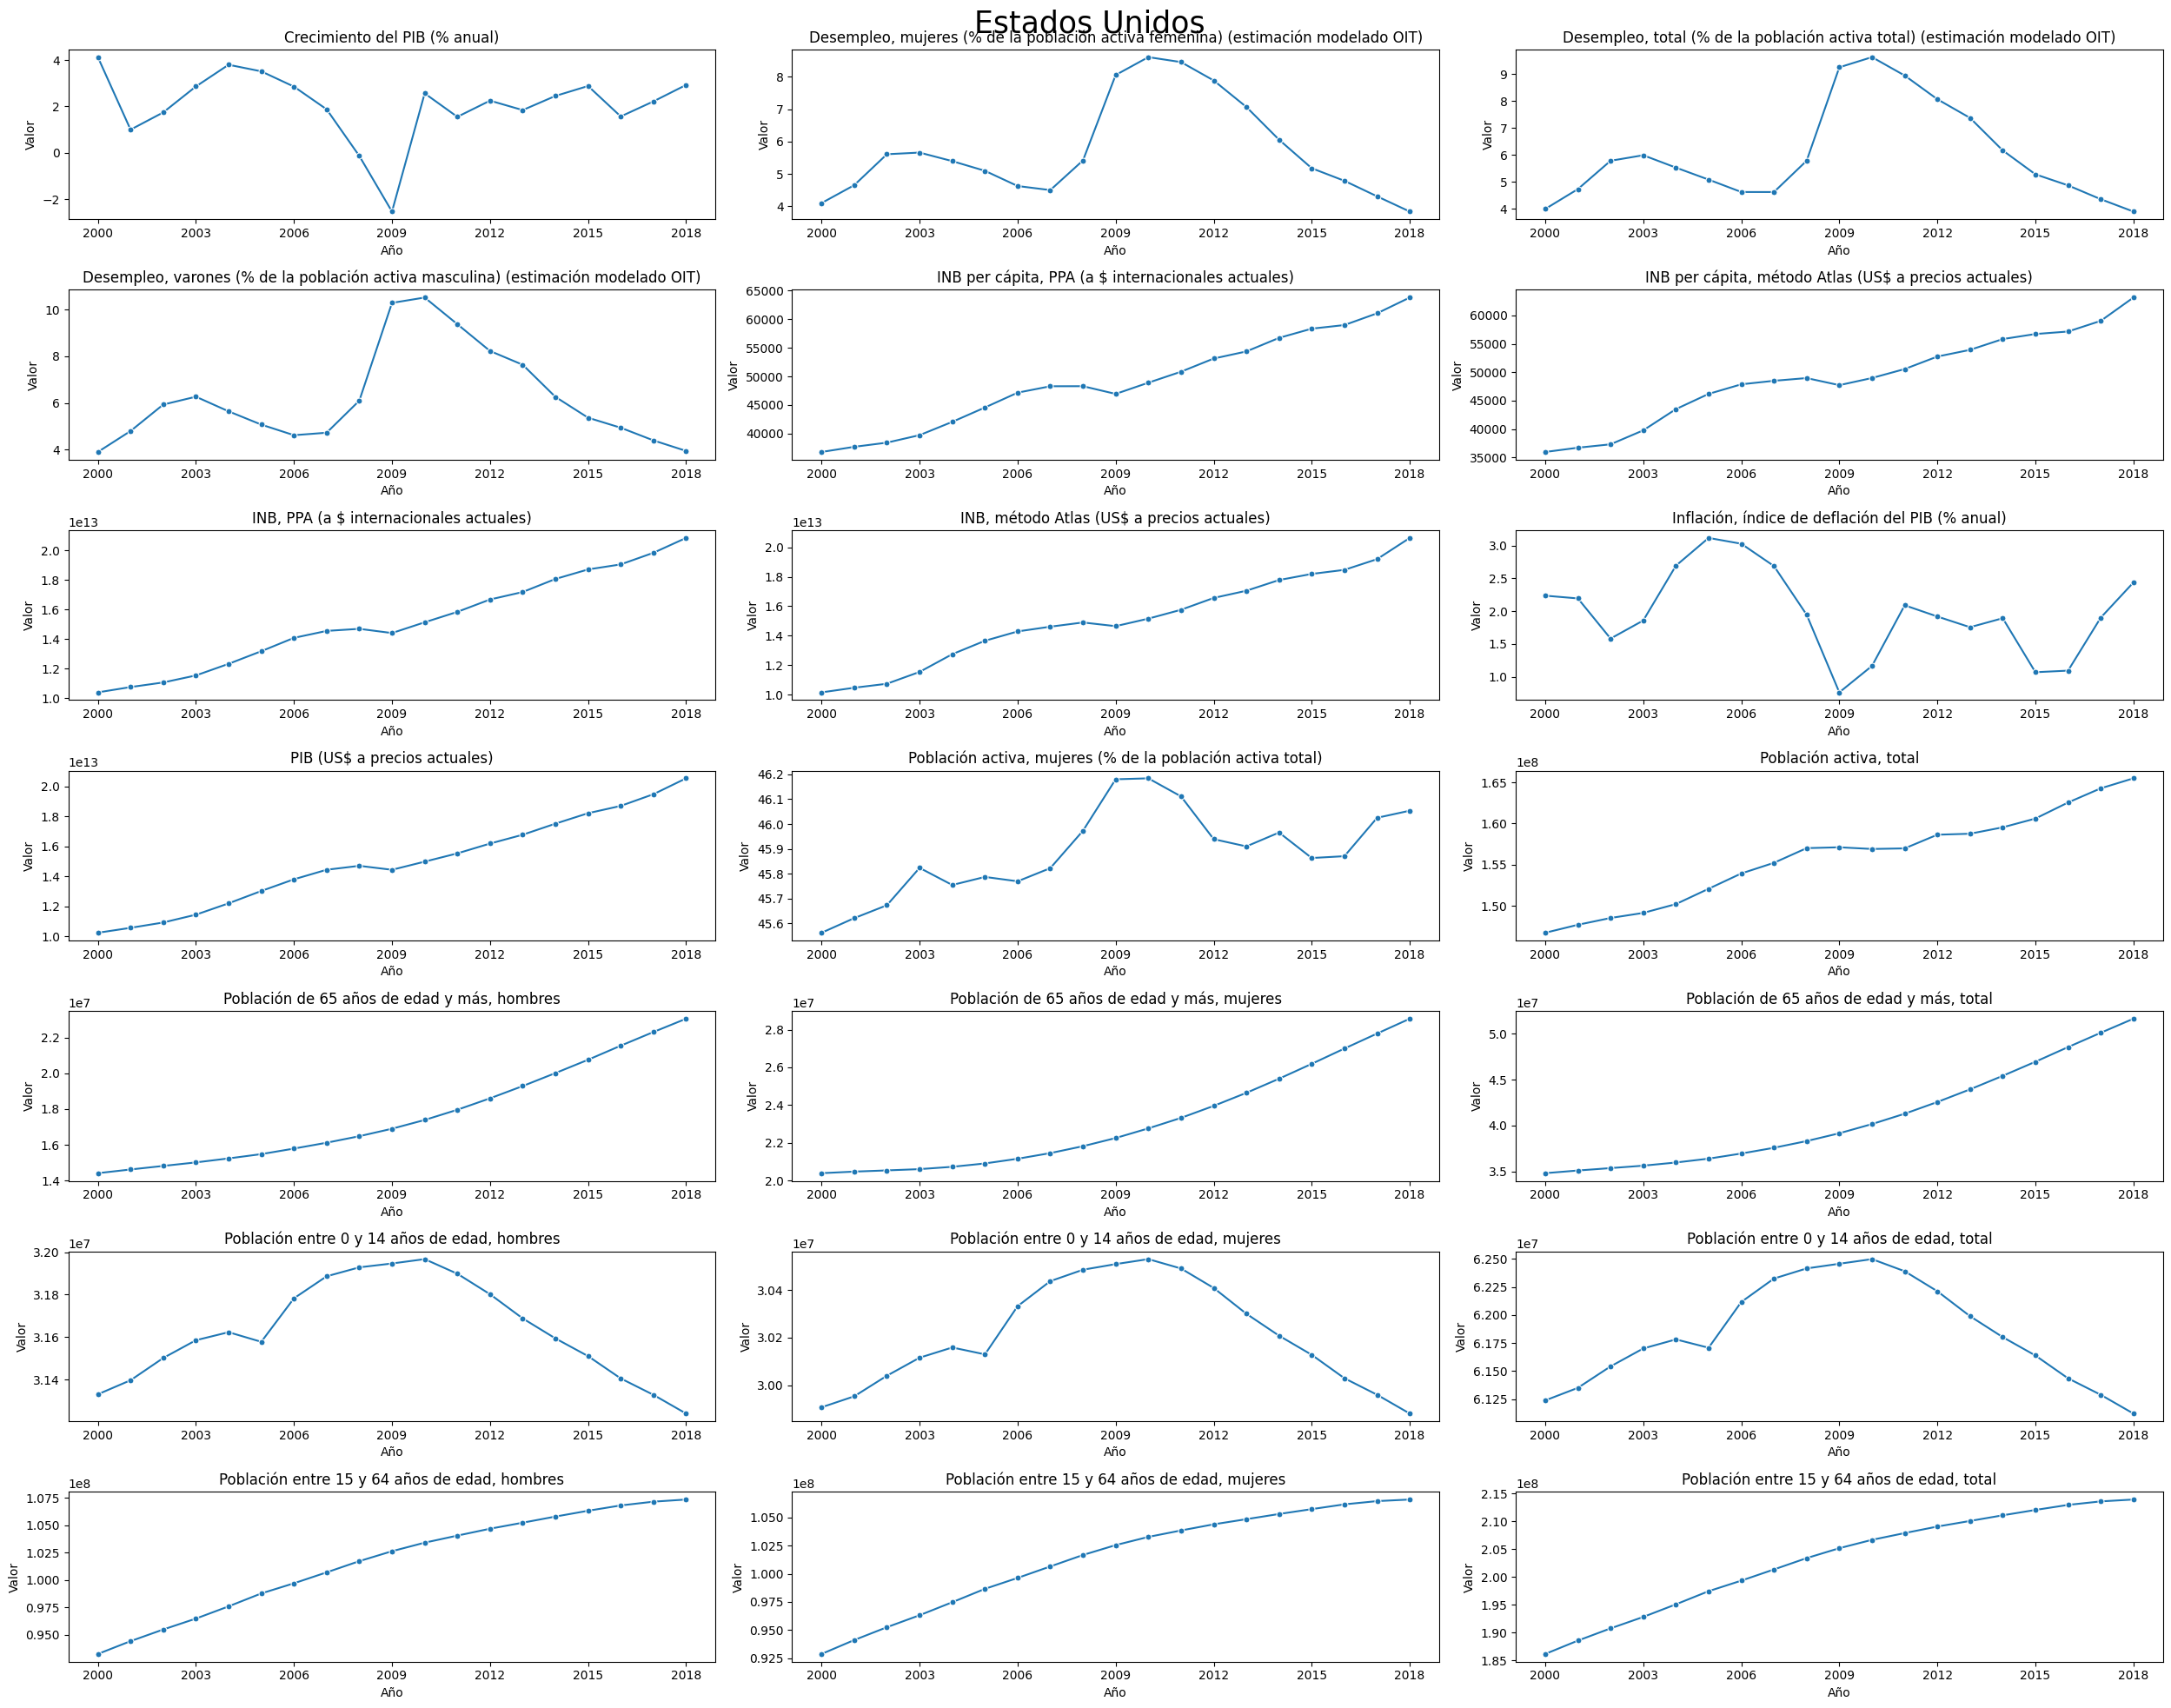

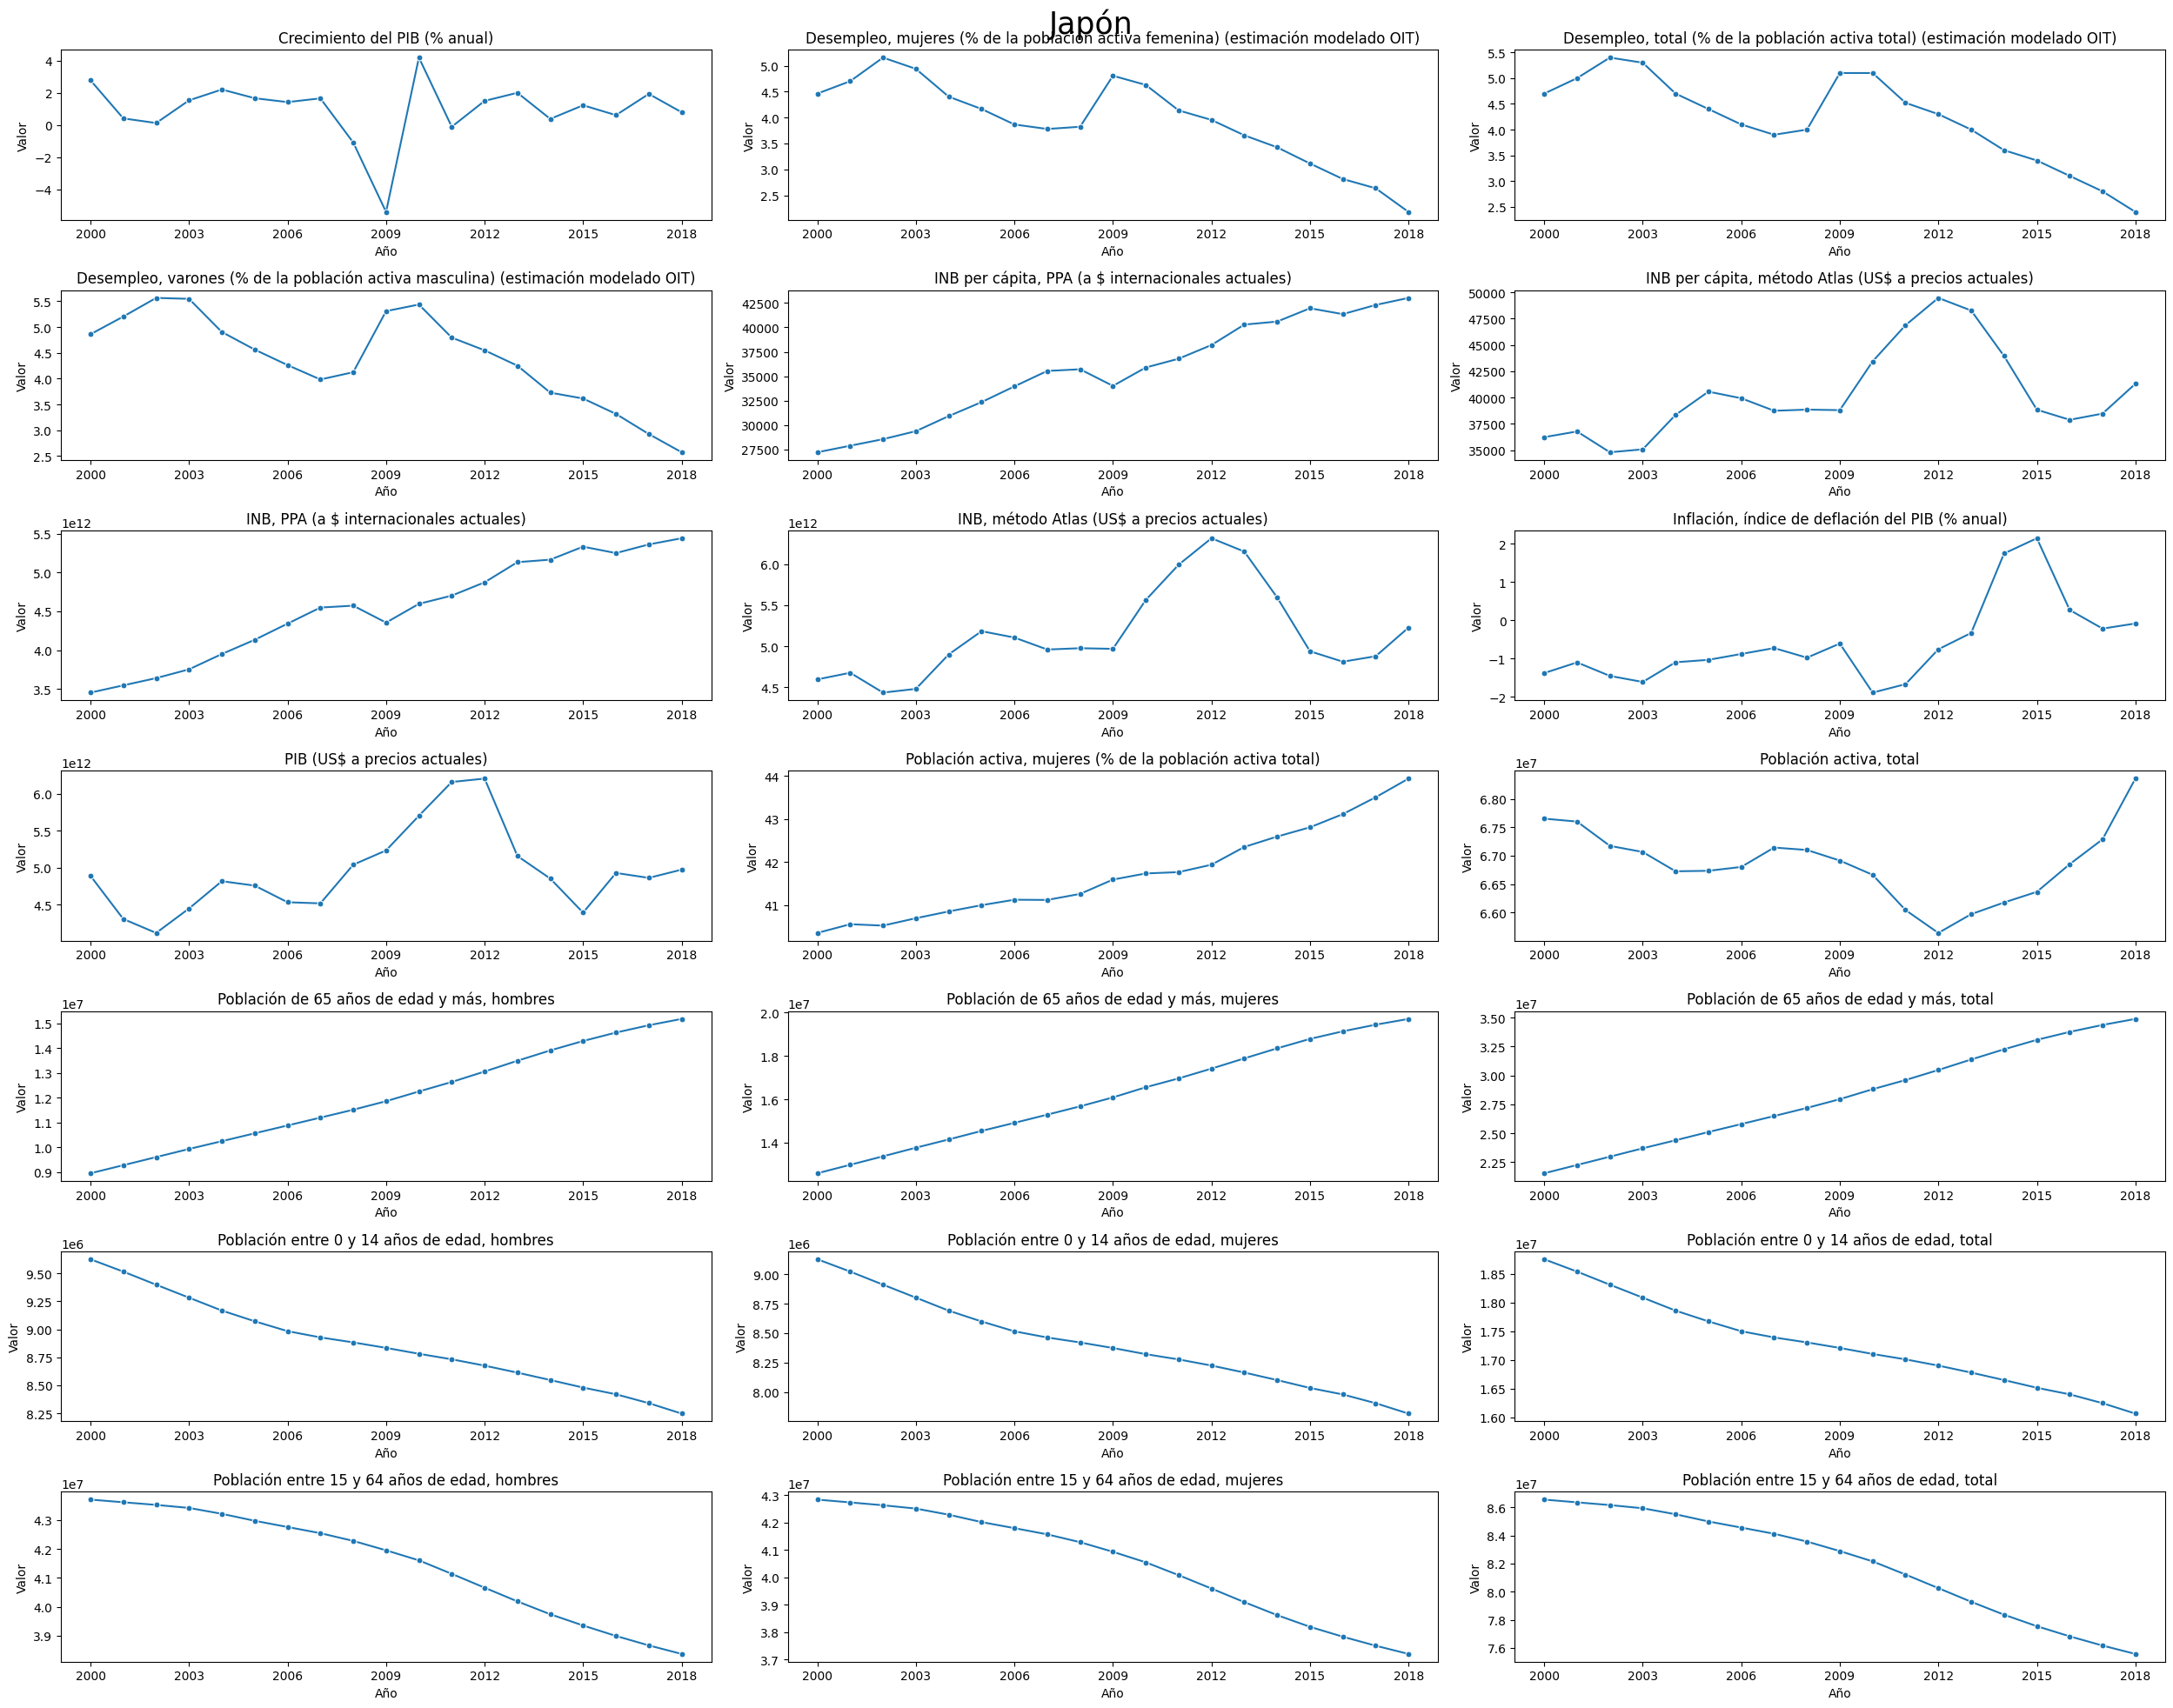

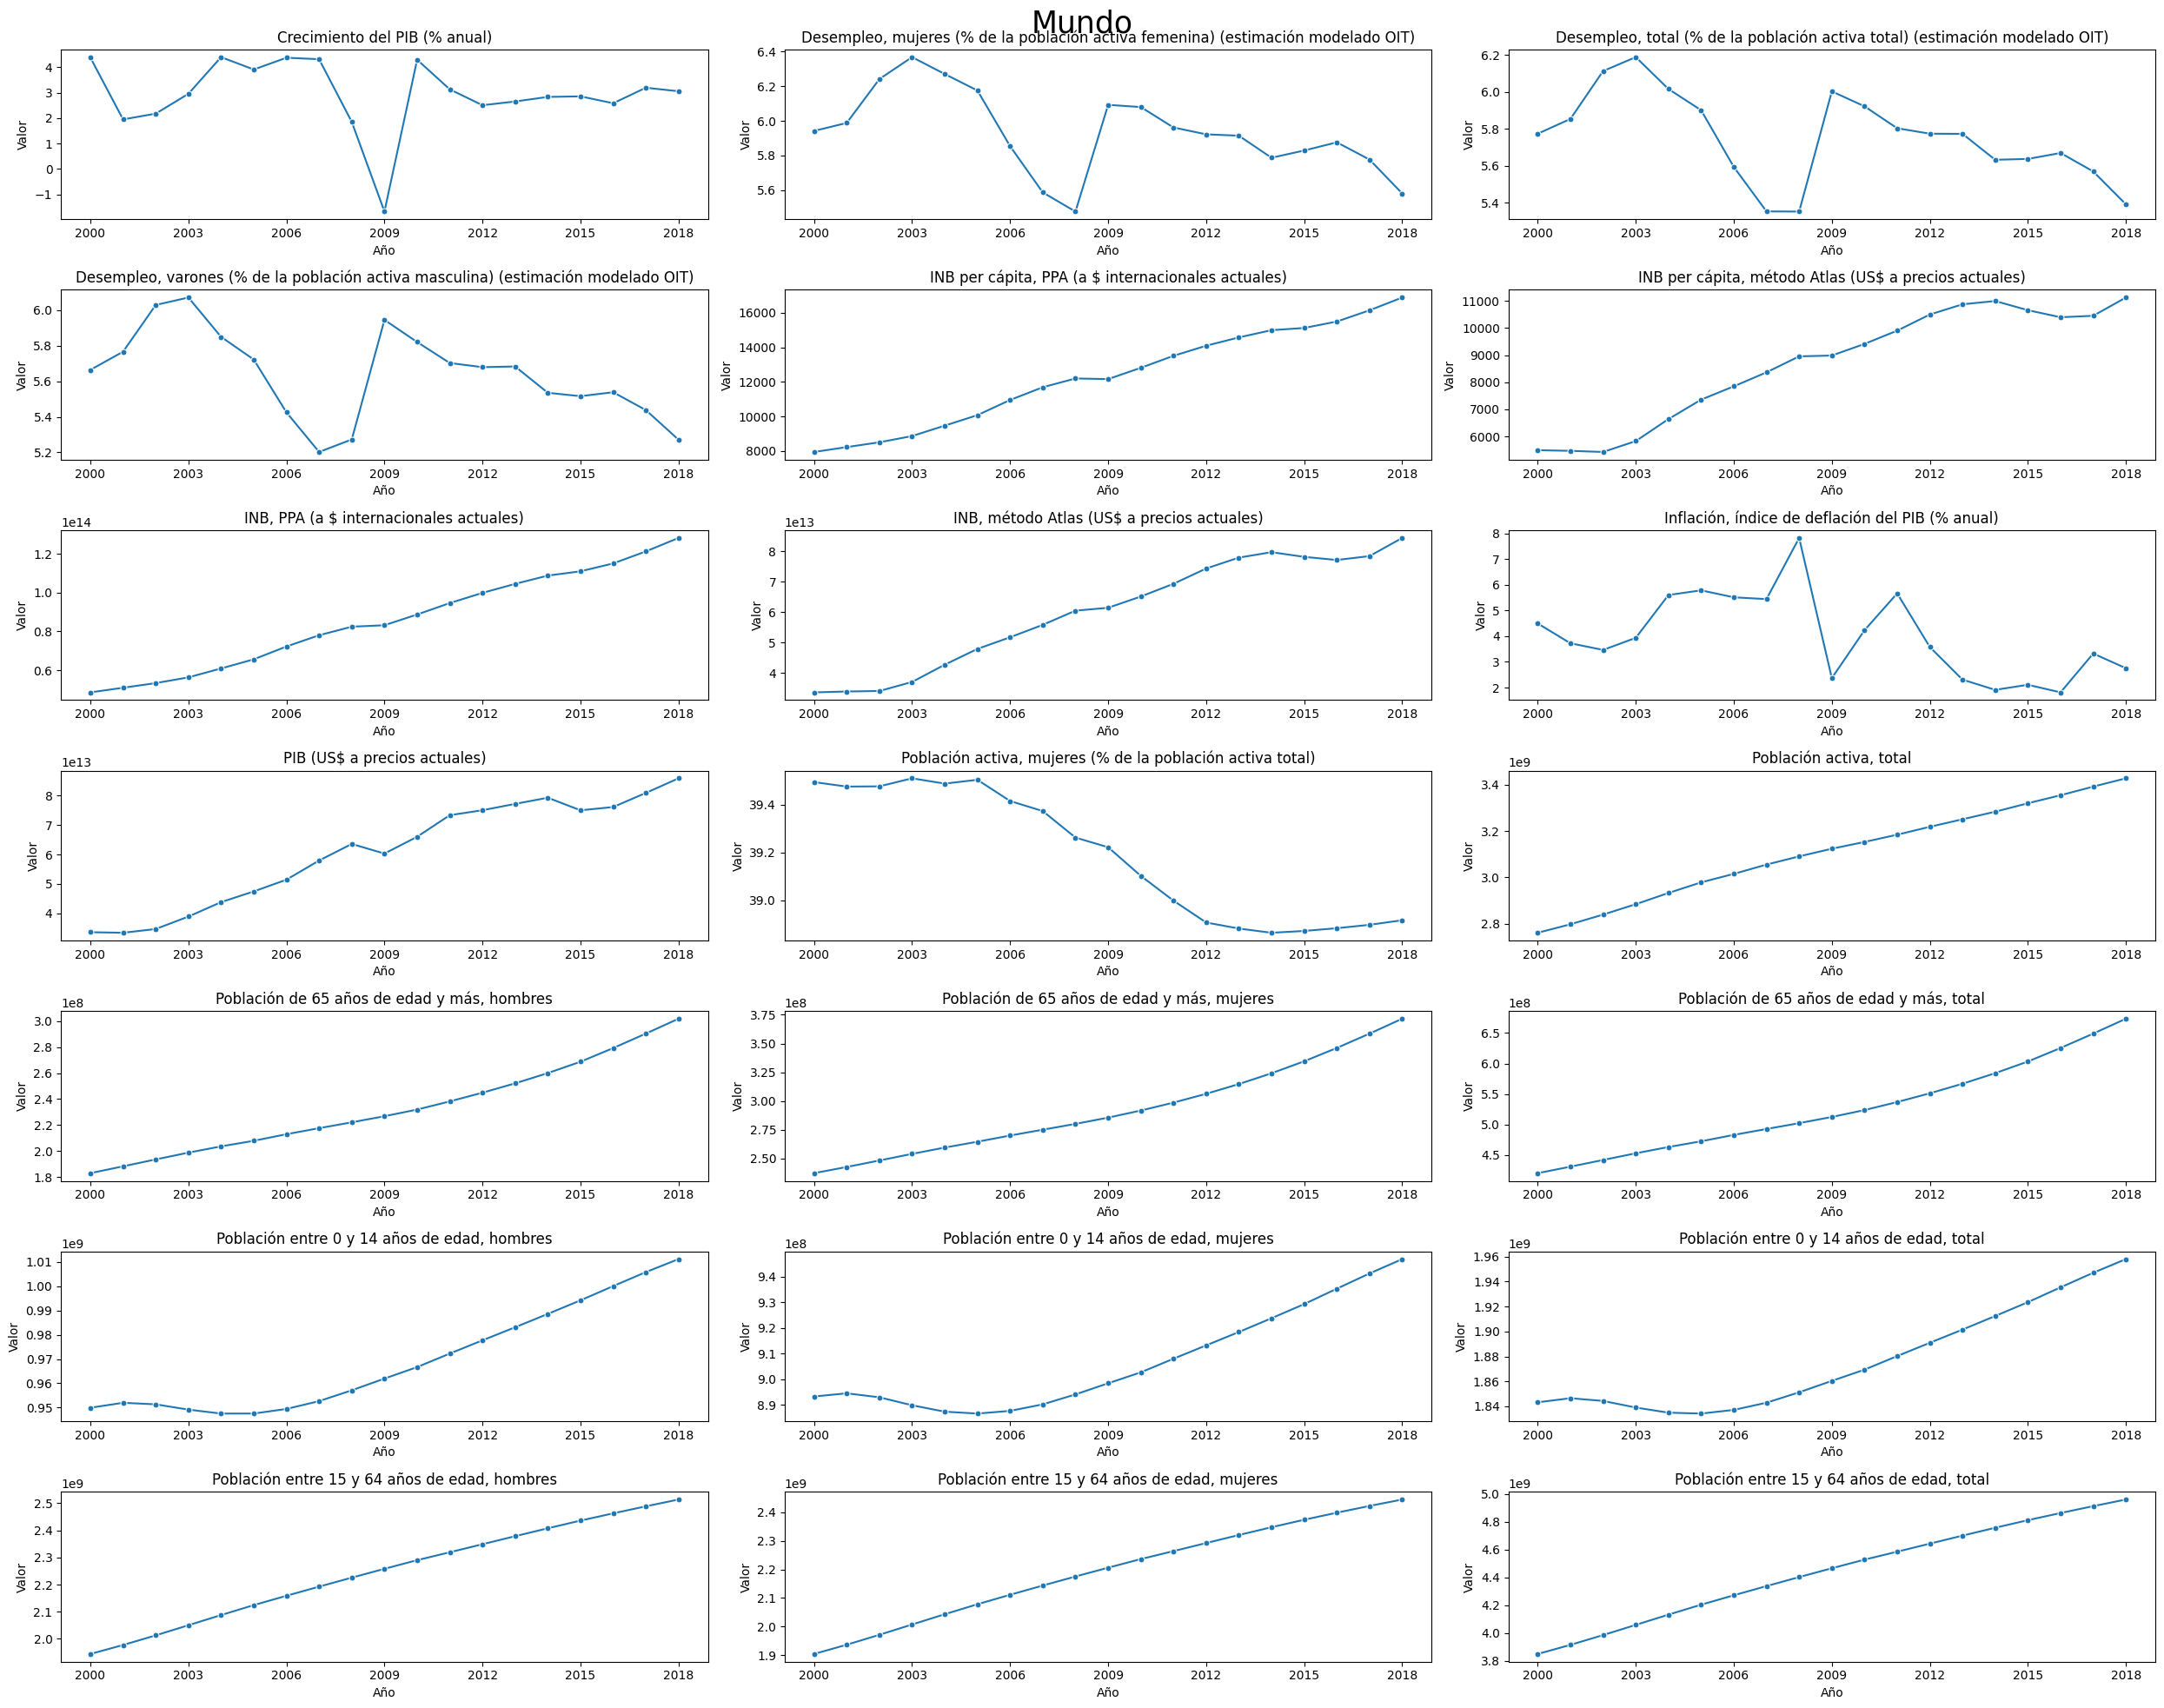

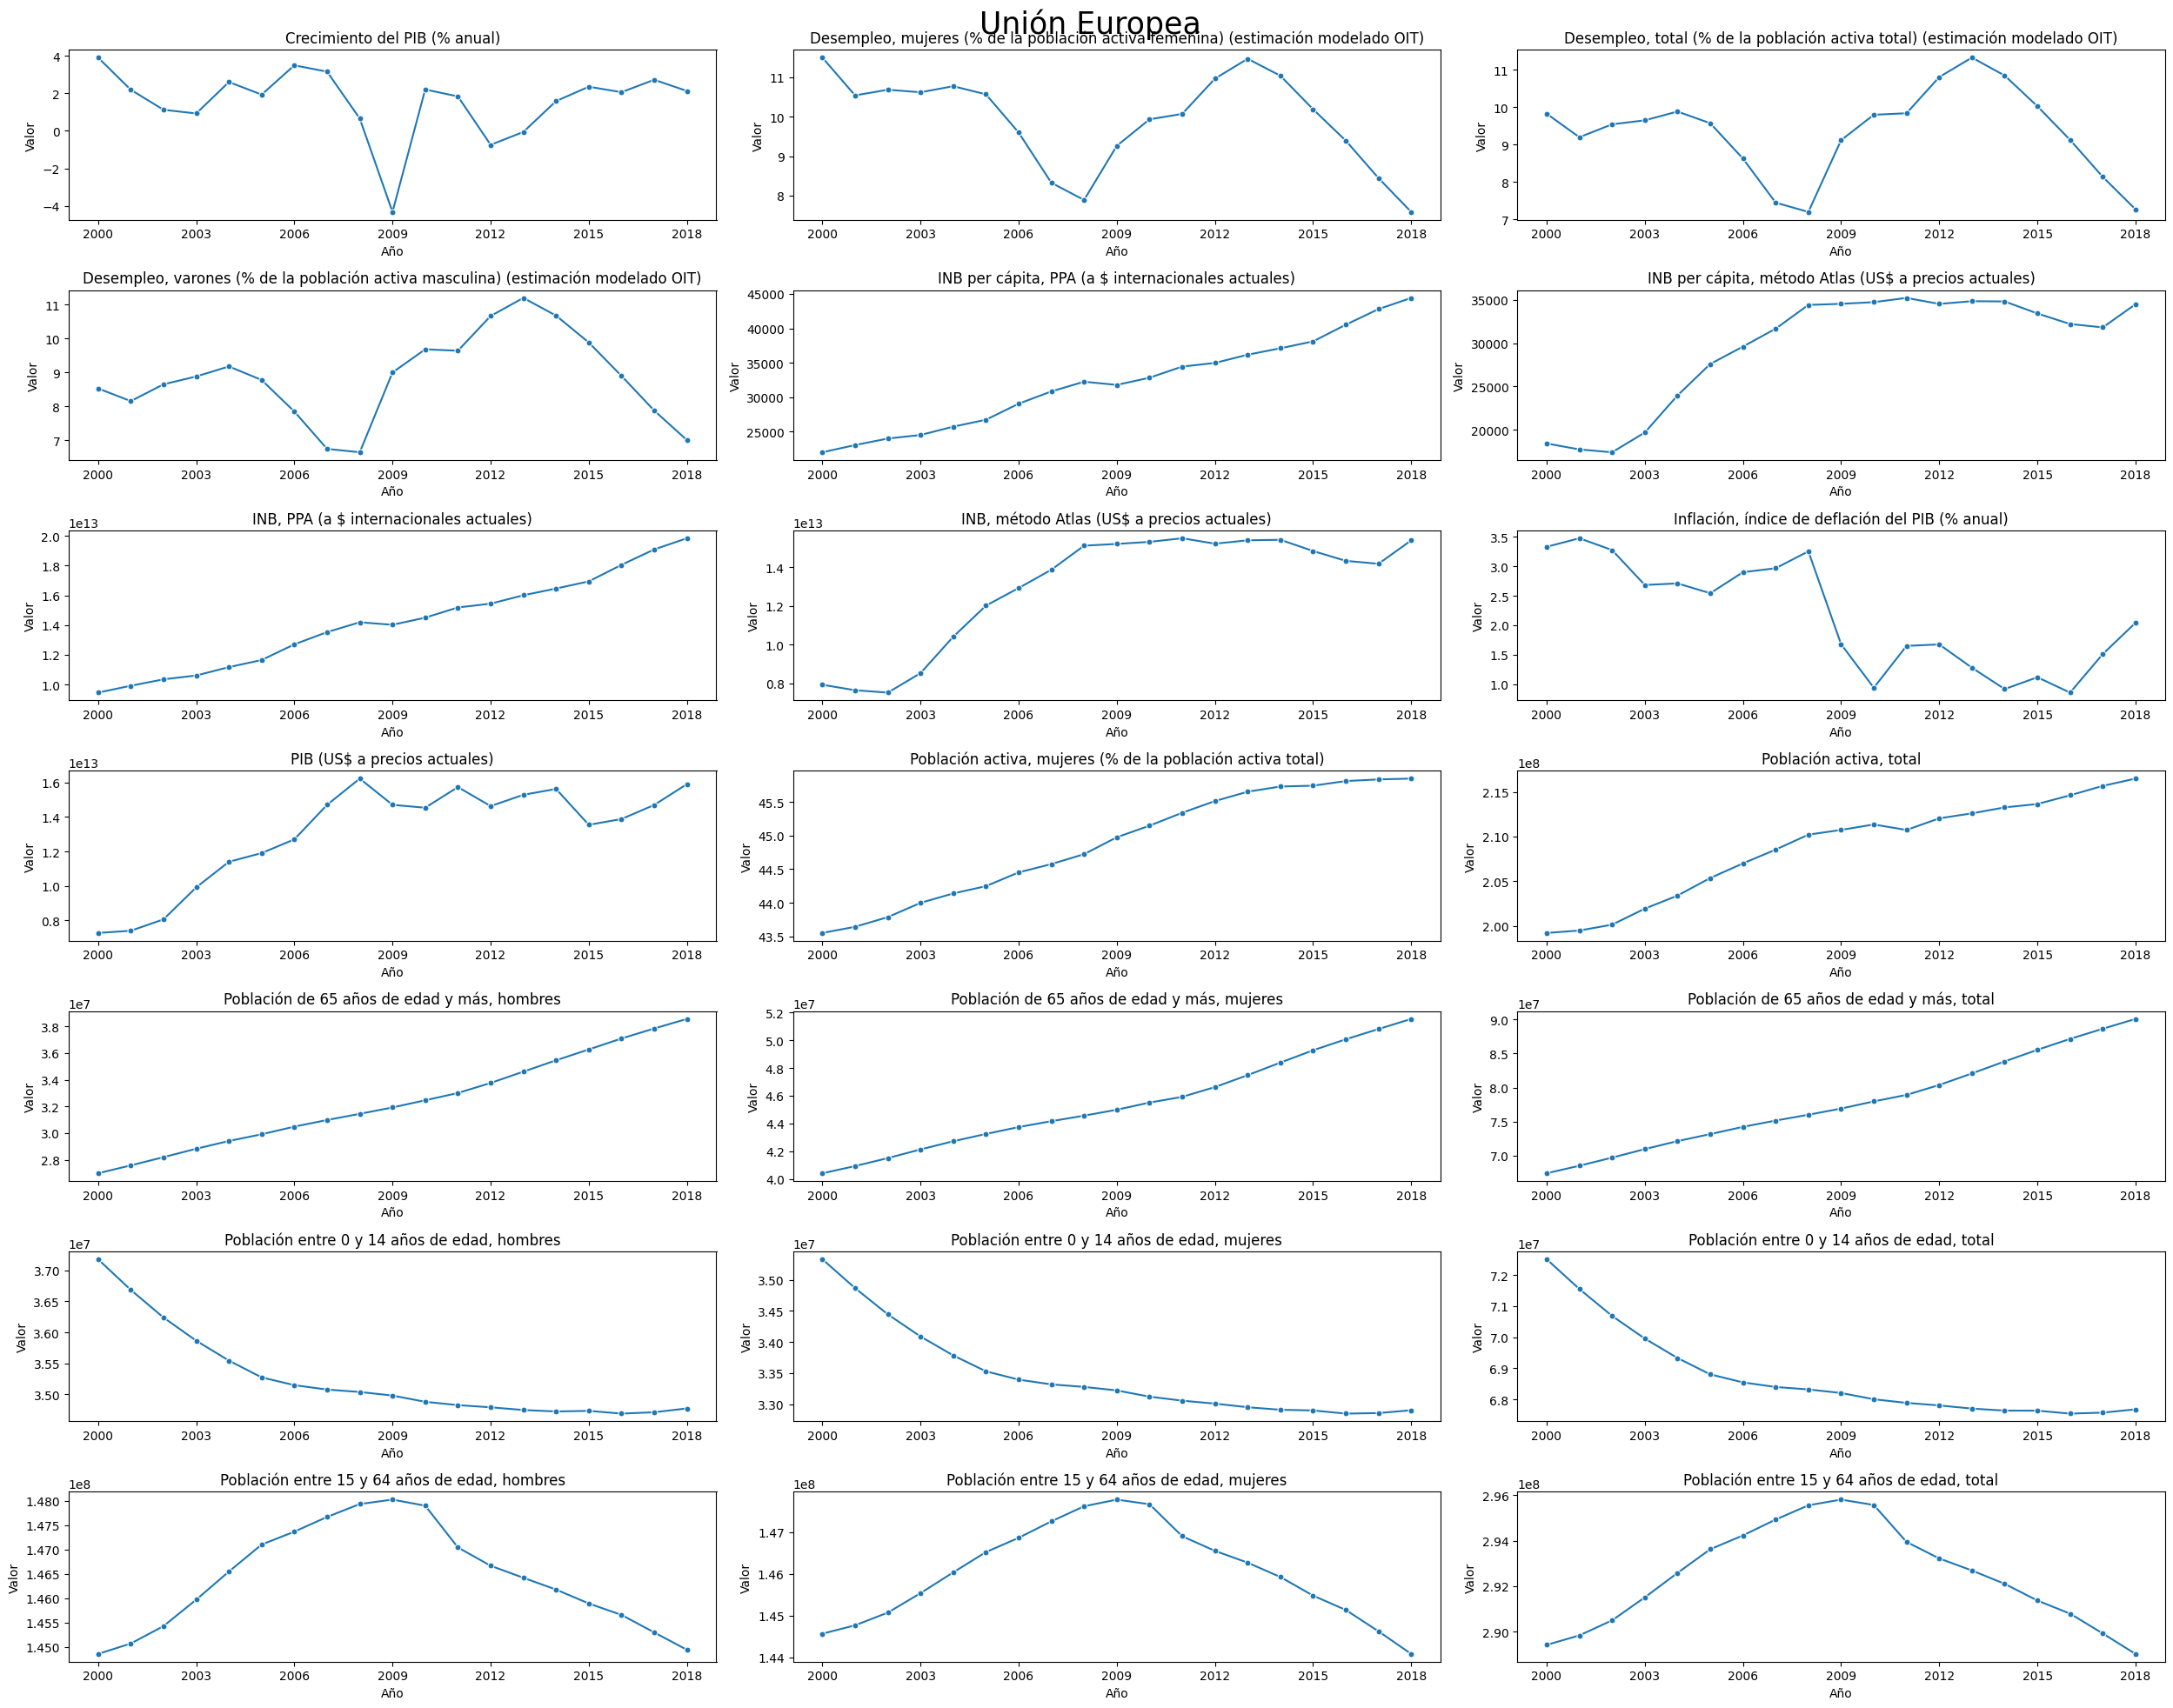

In [22]:
# let´s see the variables distributions. We have 20 variables per country.

countries = indicadores['Country Name'].unique()
variables = indicadores.columns[2:]
years = indicadores['Year'].unique()

for country in countries:
    plt.figure(figsize=(25,20))
    data = indicadores[indicadores['Country Name'] == country]

    for i, variable in enumerate(variables):
        plt.subplot(7,3 , i+1)
        
        sns.lineplot(x=years, y=data[variable], marker='o', linestyle='-', markersize=5)
        
        plt.title(f'{variable}')
        plt.xlabel('Año')
        plt.ylabel('Valor')
        plt.xticks(range(2000, 2019, 3))

    plt.suptitle(country, fontsize=25)
    plt.tight_layout()
    plt.show()
